### _Activation Functions & Optimizers_

In [1]:
# libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# data
df = pd.read_csv('diabetes.csv')
df['gender'] = df['gender'].astype('category').cat.codes
df['smoking_history'] = df['smoking_history'].astype('category').cat.codes
X = df.drop(columns = 'diabetes')
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [3]:
# create tensors
def create_tensors(X, y): # because pytorch does not understand dataframes
    features = torch.tensor(
        np.array(X, dtype = np.float16),
        dtype = torch.float32
    )
    labels = torch.tensor(
        np.array(y, dtype = np.float16),
        dtype = torch.float32
    )
    return features, labels

X_train, y_train = create_tensors(X_train, y_train)
X_test, y_test = create_tensors(X_test, y_test)

print(X_test.shape)
print(X_train.shape)

torch.Size([25000, 8])
torch.Size([75000, 8])


---

SGD & Sigmoid

In [4]:
# define network
class NN(nn.Module):
    def __init__(self, n_feats):
        super().__init__()
        self.linear_layer_1 = nn.Linear(n_feats, 15) # 15 neurons in the hidden layers
        self.linear_layer_2 = nn.Linear(15, 1)

    def forward(self, feats):
        x = torch.sigmoid(self.linear_layer_1(feats)) # set activation function 
        return self.linear_layer_2(x)
    
model = NN(X.shape[1]) # number of input features 

# set loss and optimization methods
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) # set optimizer 

# data handling
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

# model training
n_epochs = 20
train_losses_sgd = []
test_losses_sgd = []

for epoch in range(n_epochs):
    model.train()
    train_epoch_loss_sgd = 0
    for batch_feats, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs_sgd = model(batch_feats)

        train_loss_sgd = criterion(outputs_sgd.squeeze(), batch_labels) # squeeze to avoid shape mismatch
        
        train_loss_sgd.backward()
        optimizer.step()
        train_epoch_loss_sgd += train_loss_sgd.item()

    train_avg_loss_sgd = train_epoch_loss_sgd / len(train_loader)
    train_losses_sgd.append(train_avg_loss_sgd)  # for plotting

    model.eval()
    y_pred = model(X_test)
    test_loss_sgd = criterion(y_pred.squeeze(), y_test)
    test_losses_sgd.append(test_loss_sgd.item())
    
    print(f"Epoch {epoch+1}/{n_epochs}, Training Loss: {train_epoch_loss_sgd/len(train_loader):.4f}, Testing Loss: {test_loss_sgd.item():.4f}")

Epoch 1/20, Training Loss: 0.3567, Testing Loss: 0.3002
Epoch 2/20, Training Loss: 0.2928, Testing Loss: 0.2937
Epoch 3/20, Training Loss: 0.2903, Testing Loss: 0.2932
Epoch 4/20, Training Loss: 0.2901, Testing Loss: 0.2932
Epoch 5/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 6/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 7/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 8/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 9/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 10/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 11/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 12/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 13/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 14/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 15/20, Training Loss: 0.2901, Testing Loss: 0.2932
Epoch 16/20, Training Loss: 0.2900, Testing Loss: 0.2932
Epoch 17/20, Training Loss: 0.2901, Testing Loss: 0.2932
Epoch 18/20, Training Loss: 0.2900, Test

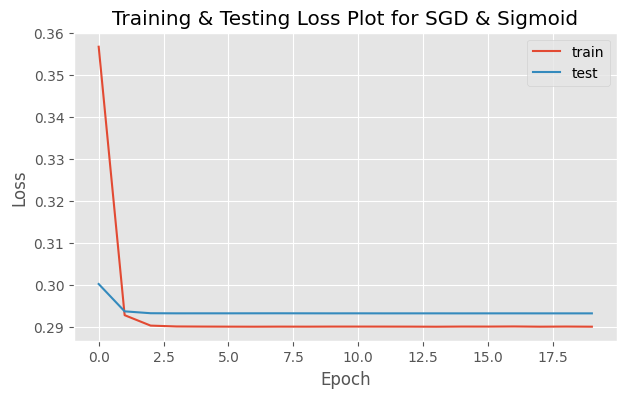

In [5]:
plt.figure(figsize = (7, 4))
plt.plot(train_losses_sgd, label = 'train')
plt.plot(test_losses_sgd, label = 'test')
plt.title("Training & Testing Loss Plot for SGD & Sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Adagrad & Tanh

In [6]:
# define network
class NN(nn.Module):
    def __init__(self, n_feats):
        super().__init__()
        self.linear_layer_1 = nn.Linear(n_feats, 15) # 15 neurons in the hidden layers
        self.linear_layer_2 = nn.Linear(15, 1)

    def forward(self, feats):
        x = torch.tanh(self.linear_layer_1(feats)) # set activation function 
        return self.linear_layer_2(x)
    
model = NN(X.shape[1]) # number of input features 

# set loss and optimization methods
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.001) # set optimizer 

# data handling
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

# model training
n_epochs = 20
train_losses_ag = []
test_losses_ag = []

for epoch in range(n_epochs):
    model.train()
    train_epoch_loss_ag = 0
    for batch_feats, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs_ag = model(batch_feats)

        train_loss_ag = criterion(outputs_ag.squeeze(), batch_labels) # squeeze to avoid shape mismatch
        
        train_loss_ag.backward()
        optimizer.step()
        train_epoch_loss_ag += train_loss_ag.item()

    train_avg_loss_ag = train_epoch_loss_ag / len(train_loader)
    train_losses_ag.append(train_avg_loss_ag)  # for plotting

    model.eval()
    y_pred = model(X_test)
    test_loss_ag = criterion(y_pred.squeeze(), y_test)
    test_losses_ag.append(test_loss_ag.item())
    
    print(f"Epoch {epoch+1}/{n_epochs}, Training Loss: {train_epoch_loss_ag/len(train_loader):.4f}, Testing Loss: {test_loss_ag.item():.4f}")

Epoch 1/20, Training Loss: 0.3834, Testing Loss: 0.3346
Epoch 2/20, Training Loss: 0.3146, Testing Loss: 0.3085
Epoch 3/20, Training Loss: 0.3004, Testing Loss: 0.2993
Epoch 4/20, Training Loss: 0.2939, Testing Loss: 0.2948
Epoch 5/20, Training Loss: 0.2903, Testing Loss: 0.2920
Epoch 6/20, Training Loss: 0.2879, Testing Loss: 0.2900
Epoch 7/20, Training Loss: 0.2860, Testing Loss: 0.2883
Epoch 8/20, Training Loss: 0.2845, Testing Loss: 0.2869
Epoch 9/20, Training Loss: 0.2832, Testing Loss: 0.2857
Epoch 10/20, Training Loss: 0.2819, Testing Loss: 0.2843
Epoch 11/20, Training Loss: 0.2802, Testing Loss: 0.2828
Epoch 12/20, Training Loss: 0.2790, Testing Loss: 0.2819
Epoch 13/20, Training Loss: 0.2782, Testing Loss: 0.2811
Epoch 14/20, Training Loss: 0.2773, Testing Loss: 0.2802
Epoch 15/20, Training Loss: 0.2765, Testing Loss: 0.2795
Epoch 16/20, Training Loss: 0.2759, Testing Loss: 0.2790
Epoch 17/20, Training Loss: 0.2754, Testing Loss: 0.2784
Epoch 18/20, Training Loss: 0.2748, Test

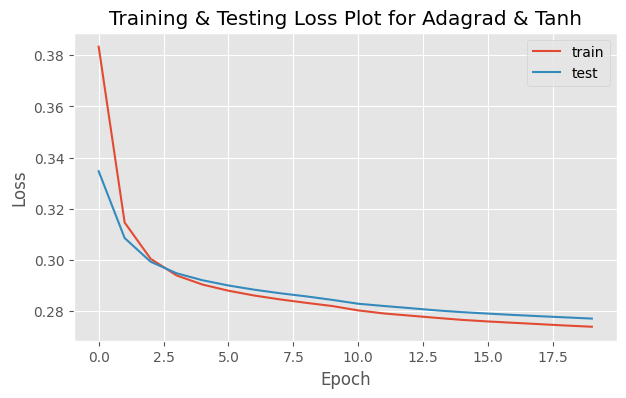

In [7]:
plt.figure(figsize = (7, 4))
plt.plot(train_losses_ag, label = 'train')
plt.plot(test_losses_ag, label = 'test')
plt.title("Training & Testing Loss Plot for Adagrad & Tanh")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Adam & ReLU

In [8]:
# define network
class NN(nn.Module):
    def __init__(self, n_feats):
        super().__init__()
        self.linear_layer_1 = nn.Linear(n_feats, 15) # 15 neurons in the hidden layers
        self.linear_layer_2 = nn.Linear(15, 1)

    def forward(self, feats):
        x = torch.relu(self.linear_layer_1(feats)) # set activation function 
        return self.linear_layer_2(x)
    
model = NN(X.shape[1]) # number of input features 

# set loss and optimization methods
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) # set optimizer 

# data handling
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

# model training
n_epochs = 20
train_losses_adam = []
test_losses_adam = []

for epoch in range(n_epochs):
    model.train()
    train_epoch_loss_adam = 0
    for batch_feats, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs_adam = model(batch_feats)

        train_loss_adam = criterion(outputs_adam.squeeze(), batch_labels) # squeeze to avoid shape mismatch
        
        train_loss_adam.backward()
        optimizer.step()
        train_epoch_loss_adam += train_loss_adam.item()

    train_avg_loss_adam = train_epoch_loss_adam / len(train_loader)
    train_losses_adam.append(train_avg_loss_adam)  # for plotting

    model.eval()
    y_pred = model(X_test)
    test_loss_adam = criterion(y_pred.squeeze(), y_test)
    test_losses_adam.append(test_loss_adam.item())
    
    print(f"Epoch {epoch+1}/{n_epochs}, Training Loss: {train_epoch_loss_adam/len(train_loader):.4f}, Testing Loss: {test_loss_adam.item():.4f}")

Epoch 1/20, Training Loss: 0.2940, Testing Loss: 0.2569
Epoch 2/20, Training Loss: 0.2390, Testing Loss: 0.2364
Epoch 3/20, Training Loss: 0.2150, Testing Loss: 0.2046
Epoch 4/20, Training Loss: 0.1944, Testing Loss: 0.1871
Epoch 5/20, Training Loss: 0.1743, Testing Loss: 0.1662
Epoch 6/20, Training Loss: 0.1585, Testing Loss: 0.1561
Epoch 7/20, Training Loss: 0.1471, Testing Loss: 0.1410
Epoch 8/20, Training Loss: 0.1387, Testing Loss: 0.1354
Epoch 9/20, Training Loss: 0.1337, Testing Loss: 0.1282
Epoch 10/20, Training Loss: 0.1283, Testing Loss: 0.1392
Epoch 11/20, Training Loss: 0.1272, Testing Loss: 0.1231
Epoch 12/20, Training Loss: 0.1256, Testing Loss: 0.1216
Epoch 13/20, Training Loss: 0.1241, Testing Loss: 0.1495
Epoch 14/20, Training Loss: 0.1246, Testing Loss: 0.1192
Epoch 15/20, Training Loss: 0.1228, Testing Loss: 0.1187
Epoch 16/20, Training Loss: 0.1214, Testing Loss: 0.1334
Epoch 17/20, Training Loss: 0.1211, Testing Loss: 0.1220
Epoch 18/20, Training Loss: 0.1219, Test

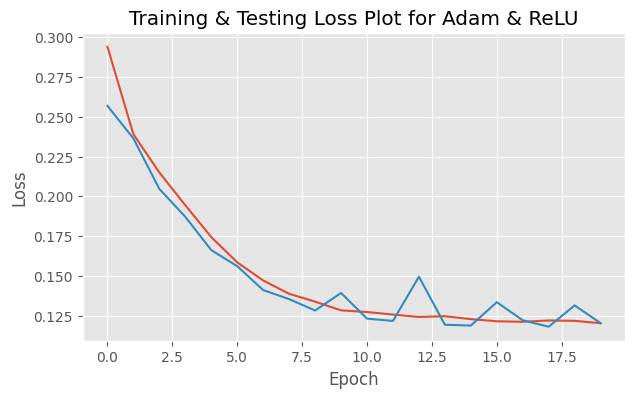

In [9]:
plt.figure(figsize = (7, 4))
plt.plot(train_losses_adam, label = 'train')
plt.plot(test_losses_adam, label = 'test')
plt.title("Training & Testing Loss Plot for Adam & ReLU")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()